# Fashion MNIST dataset

In this project I've used fashion_mnist dataset from keras.datasets package and tried applying ANN using Keras.

In [22]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [4]:
# Imported Fashion MNIST dataset
data= keras.datasets.fashion_mnist.load_data()

In [5]:
dir(data)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [6]:
(x_train, y_train), (x_test, y_test)= data  #Train test split

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
x_train[0] # 2D array.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

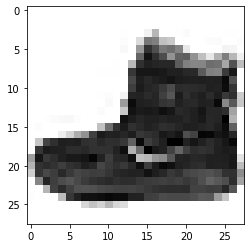

In [12]:
plt.imshow(x_train[0], cmap='gray_r')

In [13]:
y_train[0]

9

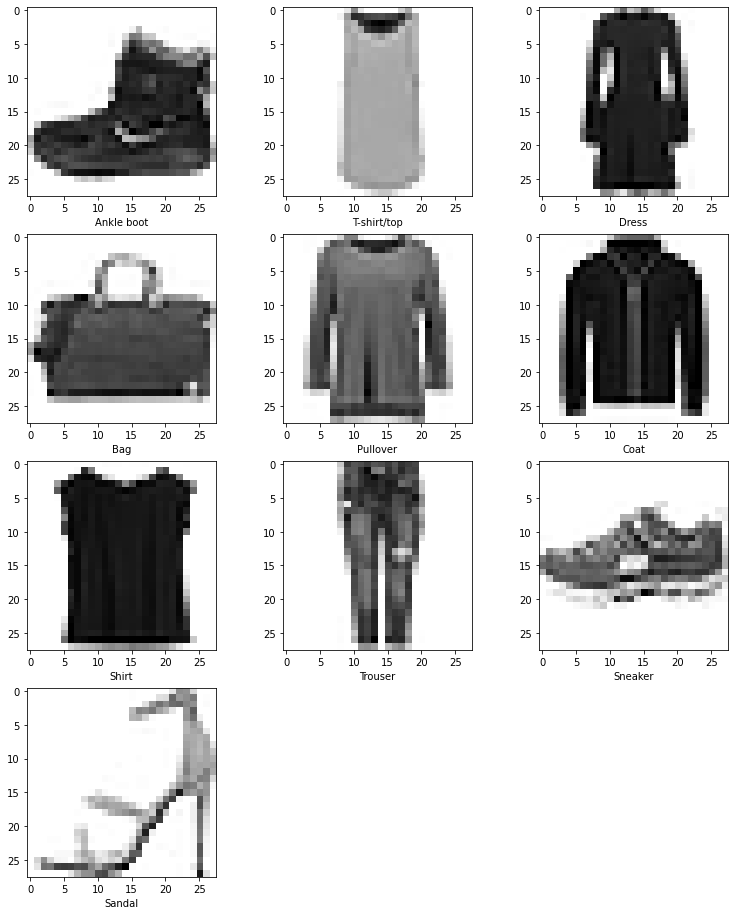

In [14]:
fig= plt.figure(figsize=(13,16))
row=[0,2,49,99,199,399,499,599,699,899]
ticks= ['Ankle boot','T-shirt/top','Dress','Bag','Pullover','Coat','Shirt','Trouser','Sneaker','Sandal']
for sp in range(10):    
    ax= fig.add_subplot(4,3,sp+1)
    image= x_train[row[sp]]
    ax.imshow(image, cmap='gray_r')
    ax.set_xlabel(ticks[sp])
plt.show()

In [15]:
# Normalized the data between 0 to 1 by dividing with 255 ( color scale)
x_train= x_train/255
x_test= x_test/255

In [16]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential

In [18]:
# with one hidden layer.
model= Sequential(
    [
        Flatten(input_shape=[28,28]),   # Input layer of size 28/28 2d converted into 1d for nn.
        Dense(20, activation= 'relu'),  # 20 neurons in 1st hidden layer.
        Dense(10, activation= 'softmax'), # 10 distinct prob values as 10 diff outputs are there.
    ]
)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss= 'sparse_categorical_crossentropy',
             optimizer= 'adam',
             metrics= ['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs= 10)

Epoch 1/10
60000/60000 [==============================] - 35s 591us/step - loss: 0.5895 - accuracy: 0.8016
Epoch 2/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.4296 - accuracy: 0.8495A: 52s - loss: 0.4460 - ac - ETA: 52s - loss: 0.4446 - accurac - ETA: 51s - loss - ETA: 51s - loss: 0.4473 - accuracy: 0 - ETA: 50s - loss: 0.4481 - accura - ETA: 44s - loss: 0.4433 - acc - ETA: - ETA: 16s - loss: 0.4335 - accu - ETA: 15s - loss: 0.4328 - accurac - ETA: 14 - ETA: 4s - loss: 0.4310 - ac - E - ETA: 0s - loss:
Epoch 3/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.4006 - accuracy: 0.8589A: 1:03 - loss: 0.4160 - accuracy: 0.85 - ETA: 1:03 - loss: 0.4163 - accuracy:  - ETA: 1:02 - ETA: 1:00 - loss: 0.4177 - accu - ETA: 58s - los - ETA: -  - ETA: 10s - loss: 0.4042 - accura - ETA: 9s - loss: 0.404 - ETA
Epoch 4/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3813 - accuracy: 0.8662
Epoch 5/10
60000/60000 [============

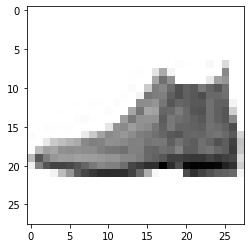

In [23]:
plt.imshow(x_test[0], cmap='gray_r')

In [24]:
yp= model.predict(x_test)

In [25]:
yp[0]

array([3.0788594e-06, 1.3688360e-10, 7.8656676e-06, 3.2448977e-06,
       2.6858183e-06, 1.5604845e-02, 1.0088108e-05, 6.7341700e-03,
       3.5826949e-04, 9.7727579e-01], dtype=float32)

In [26]:
np.argmax(yp[0])

9

In [51]:
# To measure overall accuracy.
loss, accuracy= model.evaluate(x_test, y_test)
print('This model results in {0} of loss and {1} of accuracy'.format(round(loss,3), round(accuracy,3)))

10000/10000 [==============================] - 4s 446us/step
This model results in 0.401 of loss and 0.855 of accuracy


In [31]:
y_pred_label= [np.argmax(i) for i in yp]

In [32]:
cm= metrics.confusion_matrix(y_test, y_pred_label)
cm

array([[870,   1,   6,  24,   1,   4,  85,   0,   9,   0],
       [  3, 976,   0,  16,   2,   0,   3,   0,   0,   0],
       [ 28,   4, 733,  13, 109,   0, 105,   0,   8,   0],
       [ 46,  35,   3, 823,  46,   1,  38,   0,   8,   0],
       [  1,   3,  96,  22, 757,   0, 113,   0,   8,   0],
       [  0,   0,   0,   0,   0, 954,   0,  16,   2,  28],
       [195,   1,  77,  22,  54,   0, 640,   0,  11,   0],
       [  0,   0,   0,   0,   0,  41,   0, 855,   0, 104],
       [  7,   0,   6,   4,   3,   5,  11,   5, 959,   0],
       [  0,   0,   0,   0,   0,   8,   1,  11,   0, 980]], dtype=int64)

Text(0.5, 1.0, 'Truth vs Predicted values')

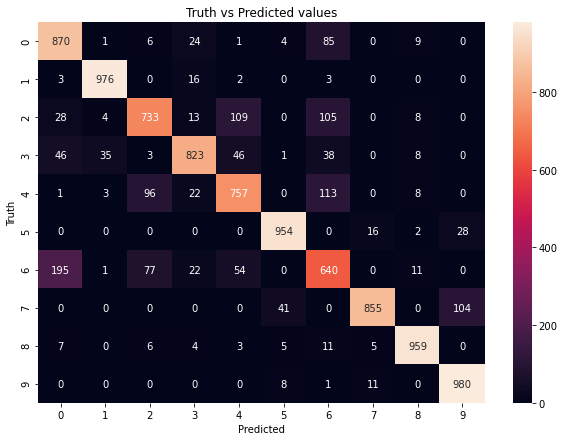

In [46]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Truth vs Predicted values')

In [38]:
# with two hidden layer.
model_2= Sequential(
    [
        Flatten(input_shape=[28,28]), 
        Dense(100, activation= 'sigmoid') # first hidden layer with 100 neurons
        Dense(20, activation= 'relu'), # second hidden layer with 20 neurons
        Dense(10, activation= 'softmax'), # 10 distinct prob values as 10 diff outputs are there.
    ]
)

In [39]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 80,730
Trainable params: 80,730
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_2.compile(loss= 'sparse_categorical_crossentropy',
             optimizer= 'adam',
             metrics= ['accuracy'])

In [41]:
model_2.fit(x_train, y_train, epochs= 10)

Epoch 1/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.5668 - accuracy: 0.8042
Epoch 2/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.3944 - accuracy: 0.8561
Epoch 3/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3549 - accuracy: 0.8721
Epoch 4/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3307 - accuracy: 0.8794
Epoch 5/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.3115 - accuracy: 0.8867
Epoch 6/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.2977 - accuracy: 0.8903
Epoch 7/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2854 - accuracy: 0.8944
Epoch 8/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2737 - accuracy: 0.89880s - loss: 0.2736 - accuracy: 0.
Epoch 9/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.2632 - accuracy: 0.90290s - loss: 0.2630 - ac

In [42]:
yp2= model_2.predict(x_test)

In [52]:
loss, accuracy= model_2.evaluate(x_test, y_test)
print('This model results in {0} of loss and {1} of accuracy'.format(round(loss,3), round(accuracy,3)))

10000/10000 [==============================] - 6s 576us/step
This model results in 0.339 of loss and 0.88 of accuracy


In [44]:
y_pred_label2= [np.argmax(i) for i in yp2]
cm2= metrics.confusion_matrix(y_test, y_pred_label2)
cm2

array([[855,   2,  12,  18,   4,   1, 103,   0,   5,   0],
       [  3, 968,   2,  21,   3,   0,   2,   0,   1,   0],
       [ 13,   0, 887,  15,  39,   0,  46,   0,   0,   0],
       [ 26,   8,  16, 886,  32,   1,  28,   0,   3,   0],
       [  0,   1, 206,  23, 704,   0,  64,   0,   2,   0],
       [  0,   0,   0,   1,   0, 966,   0,  19,   1,  13],
       [130,   0, 123,  27,  56,   0, 656,   0,   8,   0],
       [  0,   0,   0,   0,   0,  19,   0, 946,   0,  35],
       [  8,   1,   4,   3,   4,   2,   6,   3, 969,   0],
       [  0,   0,   0,   0,   0,  12,   1,  26,   0, 961]], dtype=int64)

Text(0.5, 1.0, 'Truth vs Predicted values')

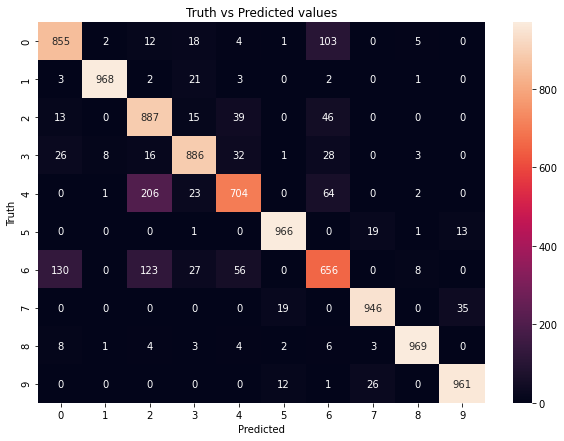

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Truth vs Predicted values')

It seems like using 2 hidden layers improved our simple accuracy to 88%. So by having more layers and more neurons tends to improve the network's performance at some instance.